# Curlee-6114_Comparison-Based Sorting Algorithms 
The following notebook was created to demonstrate the implementation of some common sorting algorithms in Python. I decided to organize this into the structure of a python notebook for organizational purpose as well as for future review. 

Implement the following sorting algorithms.

        Insertion sort
        Merge sort
        Heapsort [vector based, and insert one item at a time]
        In-place quicksort (any random item or the first or the last item of your input can be pivot).
        Modified quicksort
            Use median-of-three as pivot.
            For small sub-problem of size LaTeX: <= 8 , you must use insertion sort.


In [1]:
import time
import timeit
import random
import matplotlib.pyplot as plt

#Data Setup
I created the lists in this modular way to make easy changing values and for the purpose of simplified understanding. Each individual list is created based on the range and size indicated by the Alpha-Variables. Naming should help to keep everything organized.

Create List Sizes

In [2]:
A = 10
B = 50
C = 100
D = 500
AA = 10000
BB = 1000
CC = 40000
DD = 50000
EE = 60000
FF = 80000
AAA = 100000

Create Lists For Each Size

In [3]:
ListA = [random.randint(1,A) for num in range(A)]
ListB = [random.randint(1,B) for num in range(B)]
ListC = [random.randint(1,C) for num in range(C)]
ListD = [random.randint(1,D) for num in range(D)]
ListAA = [random.randint(1,AA) for num in range(AA)]
ListBB = [random.randint(1,BB) for num in range(BB)]
ListCC = [random.randint(1,CC) for num in range(CC)]
ListDD = [random.randint(1,DD) for num in range(DD)]
ListEE = [random.randint(1,EE) for num in range(EE)]
ListFF = [random.randint(1,FF) for num in range(FF)]
ListAAA = [random.randint(1,AAA) for num in range(AAA)]
Data = [ListA, ListB, ListC, ListD, ListBB]
data = [A, B, C, D, BB]

# Sorting Algorithms

As this project was created exclusively in Python, and I was unaware of the recursion depth limitation of Python, I created both recursive and iterative versions of algorithms in some cases. All data reported is from iterative trials. Also, this notebook is less efficient than the code found at the following Git repo: https://github.com/mcurlee3/AlgorithmComparison.git. The code is identical but trials take longer in collab (and jupyter). 

## Insertion-Sort
Insertion sort is a simple sorting algorithm that builds the final sorted array (or list) one item at a time. It is much less efficient on large lists than more advanced algorithms such as quicksort, heapsort, or merge sort.

In [4]:
def InsertionSort(List):
    for index in range(1, len(List)):
        key = List[index]
        previous = index - 1

        while previous >=0 and key < List[previous]:
            List[previous + 1] = List[previous]
            previous = previous - 1
        
        List[previous + 1] = key
    
    return List

## Merge-Sort
Merge-Sort is a sorting algorithm based on the notion of divide-and-conquer. Divide-and-conquer is named as such because input is divided into smaller portions, each portion is solved and then recombined to solve the original problem. In this module both iterative and recursive versions are present. 

In [5]:
##Merge for Recursive Merge Sort
def Merge(List, l, m, r):
   n1 = m-l+1
   n2 = r-m

   left = [0]*n1
   right = [0]*n2

   for i in range(0, n1):
       left[i] = List[i+l]

   for i in range(0, n2):
       right[i] = List[i+1+m]

   i = 0
   j = 0
   k = l

   while i < n1 and j < n2:
       if left[i] < right[j]:
           List[k] = left[i];
           i += 1
       else:
           List[k] = right[j]
           j += 1
       k += 1

   while i < n1:
       List[k] = left[i]
       k += 1
       i += 1
   while j < n2:
       List[k] = right[j]
       k += 1
       j += 1



def MergeSort(List, left, right):
  if left < right:
     middle = (left + right)//2
     MergeSort(List, left, middle)
     MergeSort(List, middle+1, right)
     Merge(List, left, middle, right)

##Iterative MergeSort
def MergeSortI(a):
   current_size = 1
   # traversing subarrays
   while current_size < len(a) - 1:
      left = 0
      # subarray being sorted
      while left < len(a)-1:
         # calculating mid value
         mid = left + current_size - 1
         # current_size
         right = ((2 * current_size + left - 1, len(a) - 1)[2 * current_size + left - 1 > len(a)-1])
         # Merge
         Merge(a, left, mid, right)
         left = left + current_size*2
      # Increasing sub array size
      current_size = 2 * current_size

## Heap
A Heap is a binary tree that stores keys at interal nodes and satisfies the following parameters:
1. For every internal node 'x' other than the root, the value stored in 'x' is greater than the value stored in its parent.
2. If 'h' is the height of the tree, for i = (0..h-1) there are 2^i nodes at depth i.
3. At depth h-1 the internal nodes are left of those external and the last node of the heap is farthest right.

## Heapsort [vector based, and insert one item at a time]
Heapsort is much faster than quadratic sorting algorithms such as insertion-sort, and can sort an array of n items at a complexity of O(nlogn). 

In [6]:
##DownHeap Recursive
def DownHeap(List, i, n):
  left = 2*i + 1
  right = 2*i + 2
  j = i
  if (left < n) and (List[left] > List[i]):
    i = left
  if (right < n) and (List[right] > List[i]):
    i = right
  if i != j:
    List[i], List[j] = List[j], List[i]
    DownHeap(List, i, n)

##DownHeap Iterative
def DownHeapR(List, i, n):
  done = False

  while not done:
    smallest = i
    left = 2*i + 1
    right = 2*i + 2

    if left < n and List[left] < List[i]:
      smallest = left
    else:
      smallest = i
    if right < n and List[right] < List[smallest]:
      smallest = right

    if smallest != i:
      List[i], List[smallest] = List[smallest], List[i]
      i = smallest
    else:
      done = True

##HeapSort Recursive      
def HeapSort(List, left, right):
  n = len(List)
  for i in range(n//2, -1, -1):
    DownHeap(List, i, n)

  for i in range(n-1, 0, -1):
    List[i], List[0] = List[0], List[i]
    DownHeap(List, 0, i)

##HeapSort Iterative
def HeapSortI(List, left, right):
  n = len(List)
  for i in range(n//2, -1, -1):
    DownHeap(List, i, n)

  for i in range(n-1, 0, -1):
    List[i], List[0] = List[0], List[i]
    DownHeap(List, 0, i)

#Quick Sort
Quick Sort is a randomized sorting algorithm based on the notion of divide and conquer. First the data is divided by picking a random pivot element and recursively/iteratively sorting the remaing data in groups either greater or less than the pivot element. Finally the sorting is conquered when the two groups are joined back together.

In [7]:
def Partition(List, left, right):
  pivot = List[right]
  i = left - 1
  for j in range(left, right):
    if List[j] <= pivot:
      i = i + 1
      (List[i], List[j]) = (List[j], List[i])
  (List[i + 1], List[right]) = (List[right], List[i + 1])
  return i + 1

##QuickSort Recursive
def QuickSort(List, left, right):
  if left < right:
    p = Partition(List, left, right)
    QuickSort(List, left, p-1)
    QuickSort(List, p, right)

##QuickSort Iterative
def QuickSortI(List, left, right):
  n = right - left + 1
  temp = [0] * n

  l = -1

  l += 1
  temp[l] = left
  l += 1
  temp[l] = right

  while l >= 0:

    right = temp[l]
    l -= 1
    left = temp[l]
    l -= 1

    p = Partition(List, left, right)

    if p-1 > left:
      l += 1
      temp[l] = left
      l += 1
      temp[l] = p-1

    if p + 1 < right:
      l += 1
      temp[l] = p+1
      l += 1
      temp[l] = right


##Modified Quick Sort (Median of Three)
This method takes the left right and median values and completes the divide and conquer method as demonstrated above. 

In [8]:
def Median(List, left, right, mid):
  l = List[left]
  m = List[mid]
  r = List[right]

  if l <= m <= r:
    return m, mid
  if r <= m <= l:
    return m, mid
  if l <= r <= m:
    return r, right
  if m <= r <= l:
    return r, right
  return l, left

def modPartition(List, left, right):
  pivot, x = Median(List, left, right, (left+right)//2)
  i = left + 1
  j = right

  while i < j:
    while i <= right and List[i] <= pivot:
      i += 1
    while j >= 0 and List[j] > pivot:
      j -= 1

    if i < j:
      List[i], List[j] = List[j], List[i]

    else:
      List[j], List[x] = pivot, List[j]
  return j

#Recursive Modified Quick Sort
def modQuickSort(List, left, right):
  if left < right: 
    if (left -1) > 8:
      p = modPartition(List, left, right)
      QuickSort(List, left, p-1)
      QuickSort(List, p+1, right)

    else:
      for i in range(left+1, right+1):
        key = List[i]
        j = i - 1

        while j >= left and List[j] > key:
          List[j+1] = List[j]
          j -= 1

        List[j+1] = key
#Iterative Modified Quick Sort
def modQuickSortI(List, left, right):
  if left < right: 
    if (right -1) > 8:
      p = modPartition(List, left, right)
      QuickSortI(List, left, p-1)
      QuickSortI(List, p+1, right)

    else:
      InsertionSort(List)

##Time Complexity
The following arrays are generated to hold run time values of different iterations and sizes. 

In [9]:
isTime = []
msTime = []
hsTime = []
qsTime = []
mqsTime = []

isTimeS = []
msTimeS = []
hsTimeS = []
qsTimeS = []
mqsTimeS = []

isTimeR = []
msTimeR = []
hsTimeR = []
qsTimeR = []
mqsTimeR = []

##The Test
This module runs each algorithm 5 times on each value. It then takes the average time for each value and holds in an array for visualization after. All algorithms are tested on a set of different size arrays in unsorted, sorted and reverse sorted orders.

In [10]:
i = 0
for d in Data:
    ##Unsorted iterations of each Algorithm
    t=0
    for i in range(5):
        test = d
        start = time.time()
        InsertionSort(test)
        end = time.time()
        t += end - start
    t = t/5
    isTime.append(t)

    t = 0 
    for i in range(5):
        test = d
        start = time.time()
        left = 0
        right = len(test) - 1
        MergeSort(test, left, right)
        end = time.time()
        t += end - start
    t = t/5
    msTime.append(t)

    t=0
    for i in range(5):
        test = d
        start = time.time()
        HeapSortI(test, 0, len(test)-1)
        end = time.time()
        t += end - start
    t = t/5
    hsTime.append(t)

    t=0
    for i in range(5):
        test = d
        start = time.time()
        QuickSortI(test, 0, len(test)-1)
        end = time.time()
        t += end - start
    t = t/5
    qsTime.append(t)

    t=0
    for i in range(5):
        test = d
        start = time.time()
        modQuickSortI(test, 0, len(test)-1)
        end = time.time()
        t += end - start
    t = t/5
    mqsTime.append(t)

    ##Sorted Iterations of each Algorithm
    t=0
    for i in range(5):
        sorted = test
        start = time.perf_counter()
        InsertionSort(sorted)
        end = time.perf_counter()
        t += end - start
    t = t/5
    isTimeS.append(t)

    t=0
    for i in range(5):
        sorted = test
        start = time.time()
        left = 0
        right = len(sorted) - 1
        MergeSort(sorted, left, right)
        end = time.time()
        t += end - start
    t = t/5
    msTimeS.append(t)

    t=0
    for i in range(5):
        sorted = test
        start = time.time()
        HeapSortI(sorted, 0, len(sorted)-1)
        end = time.time()
        t += end - start
    t = t/5
    hsTimeS.append(t)

    t=0
    for i in range(5):
        sorted = test
        start = time.time()
        QuickSortI(sorted, 0, len(sorted)-1)
        end = time.time()
        t += end - start
    t = t/5
    qsTimeS.append(t)

    t=0
    for i in range(5):
        sorted = test
        start = time.time()
        modQuickSortI(sorted, 0, len(sorted)-1)
        end = time.time()
        t += end - start
    t = t/5
    mqsTimeS.append(t)

    ##Reversed Iterations of each Algorithm
    t=0        
    for i in range(5):
        sorted.reverse()
        reversed = sorted
        start = time.time()
        InsertionSort(reversed)
        end = time.time()
        t += end - start
    t = t/5
    isTimeR.append(t)

    t=0
    for i in range(5):
        reversed = sorted
        start = time.time()
        left = 0
        right = len(reversed) - 1
        MergeSort(reversed, left, right)
        end = time.time()
        t += end - start
    t = t/5
    msTimeR.append(t)

    t=0
    for i in range(5):
        reversed = sorted
        start = time.time()
        HeapSort(reversed,  0, len(reversed)-1)
        end = time.time()
        t += end - start
    t = t/5
    hsTimeR.append(t)

    t=0
    for i in range(5):
        reversed = sorted
        start = time.time()
        QuickSortI(reversed, 0, len(reversed)-1)
        end = time.time()
        t += end - start
    t = t/5
    qsTimeR.append(t)

    t=0
    for i in range(5):
        reversed = sorted
        start = time.time()
        modQuickSortI(reversed, 0, len(reversed)-1)
        end = time.time()
        t += end - start
    t = t/5
    mqsTimeR.append(t)
    i += 1


##Data Visualization

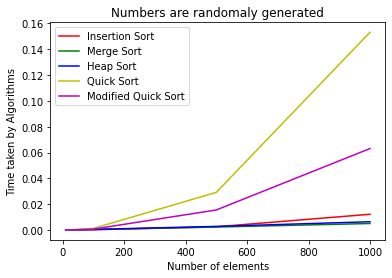

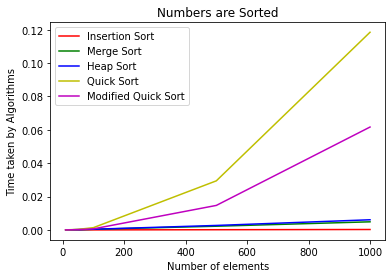

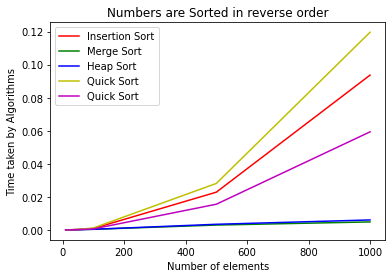

In [12]:
plt.plot(data, isTime, "r", label = 'Insertion Sort')
plt.plot(data, msTime, "g", label = 'Merge Sort')
plt.plot(data, hsTime, "b", label = 'Heap Sort')
plt.plot(data, qsTime, "y", label = 'Quick Sort')
plt.plot(data, mqsTime, "m", label = 'Modified Quick Sort')
plt.title("Numbers are randomaly generated")
plt.xlabel("Number of elements")
plt.ylabel("Time taken by Algorithms")
plt.legend()
plt.show()

plt.plot(data, isTimeS, "r", label = 'Insertion Sort')
plt.plot(data, msTimeS, "g", label = 'Merge Sort')
plt.plot(data, hsTimeS, "b", label = 'Heap Sort')
plt.plot(data, qsTimeS, "y", label = 'Quick Sort')
plt.plot(data, mqsTimeS, "m", label = 'Modified Quick Sort')
plt.title("Numbers are Sorted")
plt.xlabel("Number of elements")
plt.ylabel("Time taken by Algorithms")
plt.legend()
plt.show()

plt.plot(data, isTimeR, "r", label = 'Insertion Sort')
plt.plot(data, msTimeR, "g", label = 'Merge Sort')
plt.plot(data, hsTimeR, "b", label = 'Heap Sort')
plt.plot(data, qsTimeR, "y", label = 'Quick Sort')
plt.plot(data, mqsTimeR, "m", label = 'Quick Sort')
plt.title("Numbers are Sorted in reverse order")
plt.xlabel("Number of elements")
plt.ylabel("Time taken by Algorithms")
plt.legend()
plt.show()